In [1]:
DATA_DIR = "../data/simulation"

In [5]:
!cat ../data/simulation/scope_output/n10000_m10_size1000_cov0.02_p10_s0/summary.txt

#UNIQUE SOLUTIONS: 6 WITH VALUE 8977.0


In [31]:
import glob
import pandas as pd

# Pattern for all summary.txt files in subfolders
pattern = "../data/simulation/scope_output/*/summary.txt"

# Get file paths
filepaths = glob.glob(pattern)

# Create a list of dicts with filepath and file contents
data = []
for path in filepaths:
    try:
        with open(path, 'r') as f:
            content = f.read().strip()
        data.append({"filepath": path, "summary": content})
    except Exception as e:
        print(f"Error reading {path}: {e}")

# Convert to DataFrame
df = pd.DataFrame(data)

# Show result
print(df.head())
print(f"\nTotal files read: {len(df)}")

                                            filepath  \
0  ../data/simulation/scope_output/n1000_m10_size...   
1  ../data/simulation/scope_output/n1000_m10_size...   
2  ../data/simulation/scope_output/n10000_m10_siz...   
3  ../data/simulation/scope_output/n10000_m5_size...   
4  ../data/simulation/scope_output/n1000_m5_size5...   

                                    summary  
0    #UNIQUE SOLUTIONS: 94 WITH VALUE 954.0  
1  #UNIQUE SOLUTIONS: 100 WITH VALUE 1009.0  
2    #UNIQUE SOLUTIONS: 1 WITH VALUE 4516.0  
3    #UNIQUE SOLUTIONS: 1 WITH VALUE 4006.0  
4    #UNIQUE SOLUTIONS: 2 WITH VALUE 2042.0  

Total files read: 999


In [32]:
df

,filepath,summary
0,../data/simulation/scope_output/n1000_m10_size...,#UNIQUE SOLUTIONS: 94 WITH VALUE 954.0
1,../data/simulation/scope_output/n1000_m10_size...,#UNIQUE SOLUTIONS: 100 WITH VALUE 1009.0
2,../data/simulation/scope_output/n10000_m10_siz...,#UNIQUE SOLUTIONS: 1 WITH VALUE 4516.0
3,../data/simulation/scope_output/n10000_m5_size...,#UNIQUE SOLUTIONS: 1 WITH VALUE 4006.0
4,../data/simulation/scope_output/n1000_m5_size5...,#UNIQUE SOLUTIONS: 2 WITH VALUE 2042.0
...,...,...
994,../data/simulation/scope_output/n5000_m5_size5...,#UNIQUE SOLUTIONS: 1 WITH VALUE 2060.0
995,../data/simulation/scope_output/n10000_m5_size...,#UNIQUE SOLUTIONS: 1 WITH VALUE 4068.0
996,../data/simulation/scope_output/n10000_m10_siz...,#UNIQUE SOLUTIONS: 1 WITH VALUE 888.0
997,../data/simulation/scope_output/n5000_m15_size...,#UNIQUE SOLUTIONS: 3 WITH VALUE 15044.0


In [33]:
import re
import pandas as pd

# Example: assume df["content"] already exists
pattern = r"#UNIQUE SOLUTIONS:\s*(\d+)\s*WITH VALUE\s*([-\w\.]+)"

# Apply regex extraction
df[["unique_solutions", "value"]] = (
    df["summary"].str.extract(pattern)
)

# Convert numeric columns if possible
df["unique_solutions"] = pd.to_numeric(df["unique_solutions"], errors="coerce")
df["value"] = pd.to_numeric(df["value"], errors="coerce")

# View result
print(df.head())


                                            filepath  \
0  ../data/simulation/scope_output/n1000_m10_size...   
1  ../data/simulation/scope_output/n1000_m10_size...   
2  ../data/simulation/scope_output/n10000_m10_siz...   
3  ../data/simulation/scope_output/n10000_m5_size...   
4  ../data/simulation/scope_output/n1000_m5_size5...   

                                    summary  unique_solutions   value  
0    #UNIQUE SOLUTIONS: 94 WITH VALUE 954.0                94   954.0  
1  #UNIQUE SOLUTIONS: 100 WITH VALUE 1009.0               100  1009.0  
2    #UNIQUE SOLUTIONS: 1 WITH VALUE 4516.0                 1  4516.0  
3    #UNIQUE SOLUTIONS: 1 WITH VALUE 4006.0                 1  4006.0  
4    #UNIQUE SOLUTIONS: 2 WITH VALUE 2042.0                 2  2042.0  


In [35]:
!cat ../data/simulation/scope_output/n10000_m15_size1000_cov0.02_p15_s2/err.log

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/saminrk/workspace/scWGS-Tumor-Phylogeny/src/benchmark/run_scope_on_simulated_data.py", line 3, in <module>
    import pandas as pd
ModuleNotFoundError: No module named 'pandas'


In [34]:
df_0 = df[df['unique_solutions'] == 0]
df_0

,filepath,summary,unique_solutions,value


In [29]:
import os
import shutil

for path in df_0["filepath"]:
    folder = os.path.dirname(path)  # get parent folder
    if os.path.exists(folder):
        print(f"Deleting: {folder}")
        shutil.rmtree(folder)

Deleting: ../data/simulation/scope_output/n10000_m15_size1000_cov0.02_p15_s2
Deleting: ../data/simulation/scope_output/n1000_m15_size100_cov0.1_p5_s3
Deleting: ../data/simulation/scope_output/n10000_m15_size1000_cov0.05_p5_s0
Deleting: ../data/simulation/scope_output/n5000_m15_size500_cov0.02_p5_s1
Deleting: ../data/simulation/scope_output/n5000_m15_size100_cov0.02_p5_s3
Deleting: ../data/simulation/scope_output/n5000_m15_size100_cov0.1_p15_s1
Deleting: ../data/simulation/scope_output/n1000_m15_size1000_cov0.1_p15_s0
Deleting: ../data/simulation/scope_output/n1000_m15_size100_cov0.02_p15_s1
Deleting: ../data/simulation/scope_output/n1000_m15_size100_cov0.05_p5_s2
Deleting: ../data/simulation/scope_output/n1000_m15_size500_cov0.05_p15_s1
Deleting: ../data/simulation/scope_output/n10000_m15_size500_cov0.1_p5_s3
Deleting: ../data/simulation/scope_output/n1000_m10_size500_cov0.02_p15_s1
Deleting: ../data/simulation/scope_output/n5000_m15_size500_cov0.02_p15_s4
Deleting: ../data/simulation/

In [11]:
df['unique_solutions'].value_counts()

unique_solutions
1     345
0     216
2     103
6      48
3      41
     ... 
68      1
56      1
89      1
76      1
93      1
Name: count, Length: 87, dtype: int64

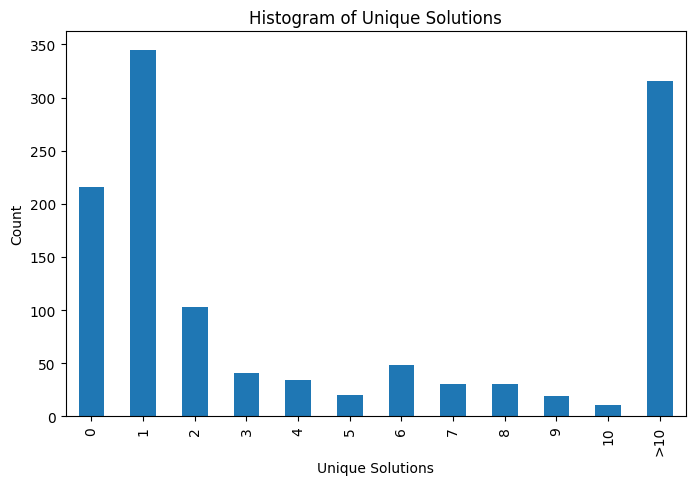

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define bins and labels
bins = list(range(0, 12)) + [np.inf]   # 0–1, 1–2, ..., 10+
labels = [str(i) for i in range(0, 10)] + ["10", ">10"]

# Bin the values
df["unique_solutions_bin"] = pd.cut(
    df["unique_solutions"],
    bins=bins,
    labels=labels,
    right=False
)

# Ensure all bins are represented (even empty ones)
counts = df["unique_solutions_bin"].value_counts().reindex(labels, fill_value=0)

# Plot
counts.plot(kind="bar", figsize=(8,5))
plt.title("Histogram of Unique Solutions")
plt.xlabel("Unique Solutions")
plt.ylabel("Count")
plt.show()


In [12]:
print(df['filepath'][0])

../data/simulation/scope_output/n10000_m15_size1000_cov0.02_p15_s2/summary.txt


In [21]:
!cat ../data/simulation/scope_output/n10000_m15_size1000_cov0.02_p15_s2/summary.txt

#UNIQUE SOLUTIONS: 1 WITH VALUE 14224.0
